# Una semplice implementazione di un classificatore binario lineare ("_perceptron_")
Proposto come modello matematico di un neurone da McCulloch e Pitts nel 1943 e implementato per la prima volta da Rosenblatt nel 1958 (https://it.wikipedia.org/wiki/Percettrone).

L'esempio di un problema che questo sistema è in grado di risolvere:
* sono dati dei punti sul piano X,Y, ognuno di essi di colore bianco (0) o nero (1), e sotto l'ipotesi che punti di colori diversi stanno in parti diverse del piano;
* è dato un insieme di questi punti, di cui è nota sia la posizione nel piano sia il colore (dunque sia le coordinate x,y, sia il classificatore, 0 o 1: il _training set_);
* dato un nuovo insieme di punti, di cui è nota la posizione nel piano ma non il colore (il _test set_), si vuole che il classificatore proponga un'ipotesi sul colore di ognuno di questi punti.

Si tratta dunque di un comportamento da classificatore binario, perché ogni punto candidato viene classificato come bianco (0) o nero (1), in funzione della sua posizione.

Costruiamo innanzitutto la classe che modella il neurone, con due metodi fondamentali:
* per classificare dei punti ("_forward pass_");
* per imparare dal risultato di una classificazione, modificando i pesi delle connessioni al neurone (_training_: "_backward pass_").
e altro...

In [1]:
%matplotlib ipympl

import numpy as np
import matplotlib.pyplot as plt

class Perceptron:
    def __init__(self, num_input:int=2, threshold:float=0.5, training_sens:float=0.1):
        """A simple (no hidden layers, 0 / 1 classification) perceptron.

        Args:
            num_input (int, optional): number of inputs to the neuron (defaults to 2)
            threshold (float, optional): classification threshold (also called "bias") (defaults to 0.5)
            training_sens (float, optional): sensitivity of training process (also called "learning rate") (defaults to 0.1)"""
        self.num_input = num_input
        self.threshold = threshold
        self.training_sens = training_sens
        self.weights = np.random.random(size=num_input)


    def classify(self, input:np.ndarray) -> int:
        """Classify the input vector (i.e., "forward pass").

        Args:
            input (np.ndarray): vector to be classified

        Returns:
            int: 0 or 1 as the classification result (i.e., data belongs either to one class (0) or to the other one (1))"""
        return 1 if np.sum(self.weights * input) >= self.threshold else 0

    def train(self, input:np.ndarray, label:float):
        """One-step training (i.e., "backward pass").

        Args:
            input (np.ndarray): training vector
            label (float): 0 or 1 as the expected ("true value") classification result"""
        r = self.classify(input)
        if r == 0 and label == 1: self.weights += input * self.training_sens
        if r == 1 and label == 0: self.weights -= input * self.training_sens

We can exploit the so defined `Perceptron` class in a simple, linearly separable case. 

In [14]:
perc = Perceptron()

NUM_TRAINS = 100
training_set = [([0.0, 0.0], 0), ([0.0, 1.0], 0), ([1.0, 0.0], 1), ([1.0, 1.0], 1)]
for i in np.random.choice(range(len(training_set)), size=NUM_TRAINS):
    perc.train(np.asarray(training_set[i][0]), training_set[i][1])

inputs = [[0,0], [0,1], [1,0], [1,1]]
print([perc.classify(np.asarray(input)) for input in inputs])

[0, 0, 1, 1]


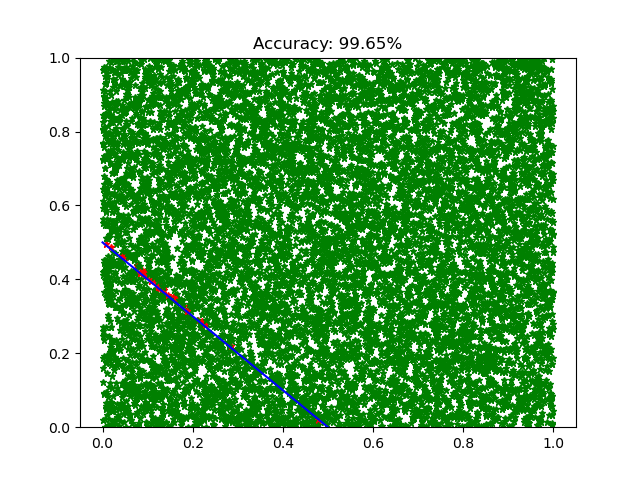

In [15]:
case = 1
NUM_TRAINS = 500
NUM_TESTS = 10000


perc = Perceptron()

def check(x:float, y:float) -> int:
    if case == 1: return 1 if x+y >= 0.5 else 0
    else: return 1 if np.sin(3*x) >= y else 0

def draw_boundary():
    x = np.linspace(0, 1, 100)
    if case == 1: y = 0.5 - x
    else: y = np.sin(3*x)
    plt.plot(x, y, color='blue')


for i in range(NUM_TRAINS):
    x = np.random.random(); y = np.random.random()
    l = check(x, y)
    perc.train(np.asarray([x, y]), l)


ris = 0
plt.clf()
for i in range(NUM_TESTS):
    x = np.random.random(); y = np.random.random()
    l = check(x, y)
    if perc.classify(np.asarray([x,y])) == l:
        ris += 1
        plt.plot(x, y, marker='*', ls='none', ms=5, color='green')
    else:
        plt.plot(x, y, marker='*', ls='none', ms=5, color='red')
plt.title(f'Accuracy: {100*ris/NUM_TESTS}%')
plt.ylim(0, 1)
draw_boundary()
plt.show()